In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

In [3]:
print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [4]:
def calculate_entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    entropy = 0.0
    for count in counts.values():
        p = count / total
        entropy -= p * np.log2(p)
    return entropy

In [5]:
entropy_dataset = calculate_entropy(y)
print(f"\nOverall Entropy of Target (Malignant vs Benign):{entropy_dataset:.4f}")


Overall Entropy of Target (Malignant vs Benign):0.9526


In [6]:
print("\nInformation Gain for Each Feature (using median split):")
for i, feature in enumerate(feature_names):
    feature_values = X[:, i]
    median_value = np.median(feature_values)
    left_mask = feature_values <= median_value
    right_mask = feature_values > median_value
    y_left = y[left_mask]
    y_right = y[right_mask]
    entropy_left = calculate_entropy(y_left)
    entropy_right = calculate_entropy(y_right)
    weighted_entropy = (len(y_left) / len(y)) * entropy_left + (len(y_right) /len(y)) * entropy_right
    info_gain = entropy_dataset - weighted_entropy
    print(f"{feature}: IG = {info_gain:.4f}")


Information Gain for Each Feature (using median split):
mean radius: IG = 0.3416
mean texture: IG = 0.1445
mean perimeter: IG = 0.3507
mean area: IG = 0.3416
mean smoothness: IG = 0.0660
mean compactness: IG = 0.2325
mean concavity: IG = 0.3695
mean concave points: IG = 0.3995
mean symmetry: IG = 0.0627
mean fractal dimension: IG = 0.0000
radius error: IG = 0.1824
texture error: IG = 0.0000
perimeter error: IG = 0.2192
area error: IG = 0.2910
smoothness error: IG = 0.0023
compactness error: IG = 0.0990
concavity error: IG = 0.1601
concave points error: IG = 0.1445
symmetry error: IG = 0.0037
fractal dimension error: IG = 0.0284
worst radius: IG = 0.4588
worst texture: IG = 0.1298
worst perimeter: IG = 0.4436
worst area: IG = 0.4556
worst smoothness: IG = 0.0990
worst compactness: IG = 0.1882
worst concavity: IG = 0.3792
worst concave points: IG = 0.4209
worst symmetry: IG = 0.0762
worst fractal dimension: IG = 0.0452


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


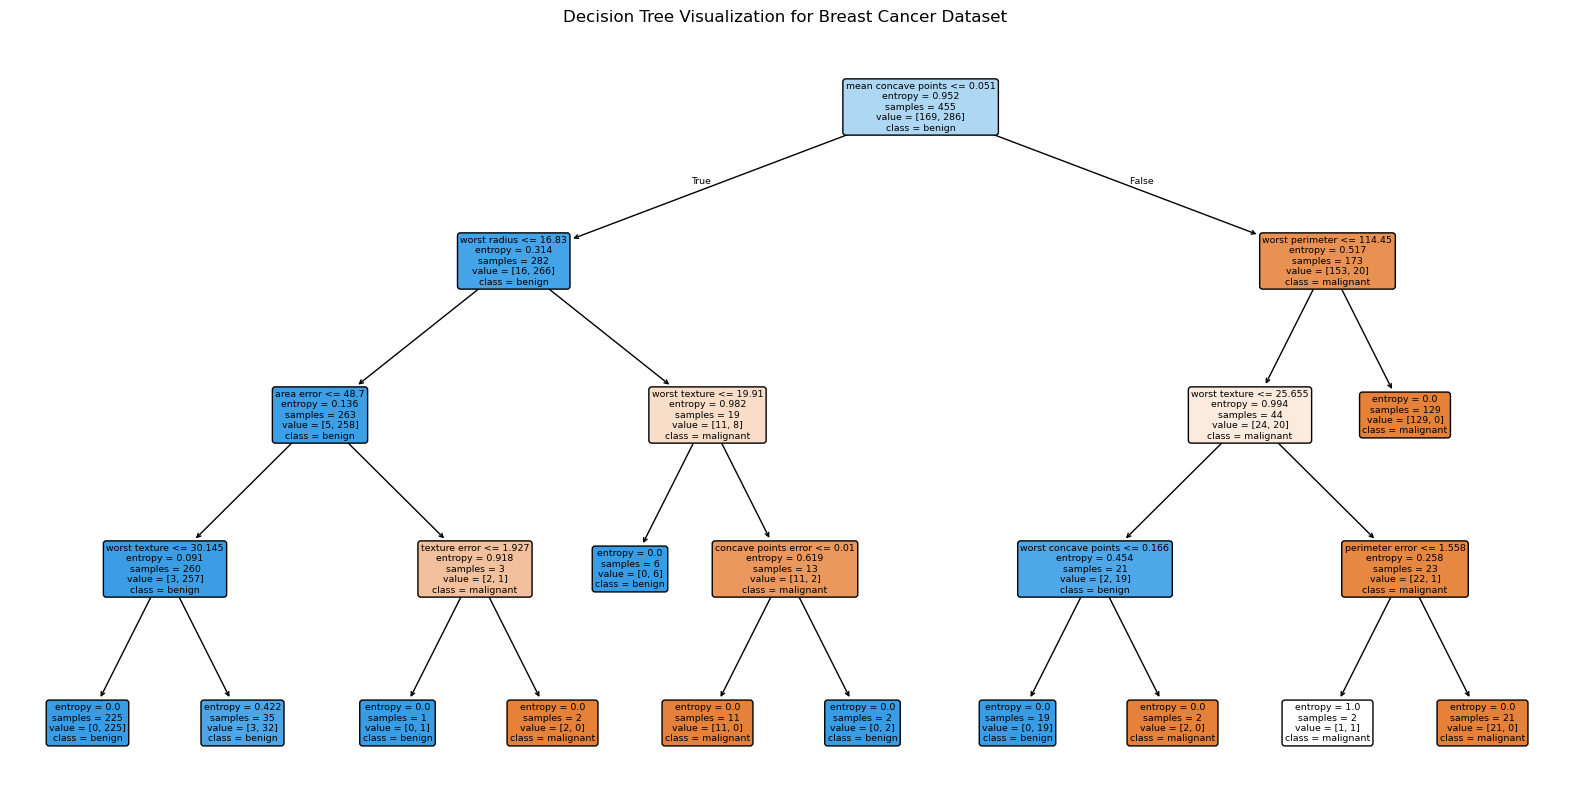

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=target_names,
filled=True, rounded=True)
plt.title("Decision Tree Visualization for Breast Cancer Dataset")
plt.show()

In [9]:
new_sample = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184,0.2776, 0.3001, 0.1471, 0.2419, 0.07871,1.095, 0.9053, 8.589, 153.4, 0.006399,
0.04904, 0.05373, 0.01587, 0.03003, 0.006193,25.38, 17.33, 184.6, 2019.0, 0.1622,0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])
prediction = clf.predict(new_sample)
print("\nPrediction for new sample:")
print("Class:", target_names[prediction[0]])


Prediction for new sample:
Class: malignant
